In [1]:
from icecream import ic

In [2]:
import pandas as pd
import numpy as np

Import energy consumption and occupation data, they are not of the same building but for now we'll use this data

In [18]:
energy_df = pd.read_csv("data/Consum horari electricitat Enginyeries 2022.csv" , ";")
occupation_df = pd.read_csv("data/ocupacio_enginyeria_2022.csv")

/var/folders/j8/64lnvrmj50q5dv_5dj_ztbz40000gn/T/ipykernel_21753/842185634.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  energy_df = pd.read_csv("data/Consum horari electricitat Enginyeries 2022.csv" , ";")


In [19]:
energy_df

,Date,Hour,Q-Enginyeria (Cos Central) [kWh] [Q-Enginyeria],Q-Enginyeria (Espina 4) [kWh] [Q-Enginyeria],Q-Enginyeria (Química) [kWh] [Q-Enginyeria]
0,01/01/2022,00:00,"26,55","1,63","71,38"
1,01/01/2022,01:00,"26,78","1,64","74,79"
2,01/01/2022,02:00,"27,08","1,63","70,65"
3,01/01/2022,03:00,"26,79","1,65","69,75"
4,01/01/2022,04:00,"27,20","1,64","69,62"
...,...,...,...,...,...
8755,31/12/2022,19:00,"40,70","0,06","90,80"
8756,31/12/2022,20:00,"37,70","0,06","86,00"
8757,31/12/2022,21:00,"37,10","0,06","83,40"
8758,31/12/2022,22:00,"37,13","0,06","80,89"


In [21]:
occupation_df

,Data inicial,Hora inicial,Data final,Hora final,Total hores,Espai,Estudi,Activitat,Alumnes matriculats,Modalitat docencia,Observacions
0,04/01/2022,15:00,04/01/2022,18:00,3,Q1/0007,NaN,Classe presencial MUEBA - M. Eugenia Suarez,0,,
1,07/01/2022,09:00,07/01/2022,11:30,2.5,Q3/1007,NaN,Examen 102712 SSD (GEST) 2 aules,0,,
2,07/01/2022,09:00,07/01/2022,11:30,2.5,Q1/1003,NaN,Examen 104525 Intro.ciutat conemporània (GCIS)...,0,,
3,07/01/2022,09:00,07/01/2022,11:30,2.5,Q3/1011,NaN,Examen 102712 SSD (GEST) 2 aules,0,,
4,07/01/2022,09:00,07/01/2022,11:30,2.5,Q2/1013,NaN,Examen 106040 Matemàtiques (GEQ) 2 aules,0,,
...,...,...,...,...,...,...,...,...,...,...,...
42006,,,,,,Q3/0003,10064 Enginyeria de Sistemes de Telecomunicació,102712 Senyals i Sistemes Discrets - 331,Sense grup de matricula,,
42007,,,,,,Q3/0003,6084 Enginyeria de Telecomunicació / Telecommu...,102712 Senyals i Sistemes Discrets - 331,Sense grup de matricula,,
42008,,,,,,Q3/0003,10063 Enginyeria Electrònica de Telecomunicació,102712 Senyals i Sistemes Discrets - 331,Sense grup de matricula,,
42009,,,,,,Q3/0003,10088 Enginyeria Informàtica i Enginyeria de S...,102712 Senyals i Sistemes Discrets - 331,Sense grup de matricula,,


the year and month doesn't match occupation so we'll have to invent a bit

In [331]:
"""
for i,r in energy_df.iterrows():
    date = energy_df.loc[i]["Date"].split("/")
    energy_df.loc[i,"Date"] = date[0] + "/" + date[1] + "/2023"

energy_df
"""

,Unnamed: 0,Date,Hour,L-Bibl.Humanitats (General) [kWh]
0,0,01/01/2023,00:00,"5,35"
1,1,01/01/2023,01:00,"4,64"
2,2,01/01/2023,02:00,"4,87"
3,3,01/01/2023,03:00,"5,43"
4,4,01/01/2023,04:00,"4,81"
...,...,...,...,...
8011,8011,30/11/2023,19:00,"80,70"
8012,8012,30/11/2023,20:00,"37,12"
8013,8013,30/11/2023,21:00,"24,40"
8014,8014,30/11/2023,22:00,"6,38"


# We want to start filtering by day

In [22]:
days = np.unique(occupation_df["Data inicial"])
days = days[1:] #eliminate " " date
days

array(['01/02/2022', '01/03/2022', '01/04/2022', '01/06/2022',
       '01/07/2022', '01/09/2022', '01/11/2022', '01/12/2022',
       '02/02/2022', '02/03/2022', '02/05/2022', '02/06/2022',
       '02/09/2022', '02/11/2022', '02/12/2022', '03/02/2022',
       '03/03/2022', '03/05/2022', '03/06/2022', '03/10/2022',
       '03/11/2022', '04/01/2022', '04/02/2022', '04/03/2022',
       '04/04/2022', '04/05/2022', '04/07/2022', '04/10/2022',
       '04/11/2022', '05/04/2022', '05/05/2022', '05/07/2022',
       '05/09/2022', '05/10/2022', '05/12/2022', '06/04/2022',
       '06/05/2022', '06/07/2022', '06/09/2022', '06/10/2022',
       '06/12/2022', '07/01/2022', '07/02/2022', '07/03/2022',
       '07/04/2022', '07/06/2022', '07/07/2022', '07/09/2022',
       '07/10/2022', '07/11/2022', '07/12/2022', '08/02/2022',
       '08/03/2022', '08/04/2022', '08/06/2022', '08/07/2022',
       '08/09/2022', '08/11/2022', '08/12/2022', '09/02/2022',
       '09/03/2022', '09/05/2022', '09/06/2022', '09/09

But... Is there any activity that data inicial is different to data final? (last many days?)

In [23]:
occupation_df[occupation_df["Data inicial"] != occupation_df["Data final"]]

,Data inicial,Hora inicial,Data final,Hora final,Total hores,Espai,Estudi,Activitat,Alumnes matriculats,Modalitat docencia,Observacions


ok, there are none... everything lasts one day

# At each hour, each day, what classes are being taken and where?

In [24]:
#to compare dates and hours
from datetime import datetime

In [25]:
#convert energy df into datetime object
for i, row in energy_df.iterrows():
    energy_df.loc[i, "Hour"] = datetime.strptime(energy_df.loc[i, "Hour"], "%H:%M").time()

In [27]:
#energy has them all so we generate from here
hours_in_day = np.unique(energy_df[energy_df["Date"] == "01/02/2022"]["Hour"])
hours_in_day

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0),
       datetime.time(3, 0), datetime.time(4, 0), datetime.time(5, 0),
       datetime.time(6, 0), datetime.time(7, 0), datetime.time(8, 0),
       datetime.time(9, 0), datetime.time(10, 0), datetime.time(11, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(14, 0),
       datetime.time(15, 0), datetime.time(16, 0), datetime.time(17, 0),
       datetime.time(18, 0), datetime.time(19, 0), datetime.time(20, 0),
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

Remove entries with nan values in occupation df. No date or no hour 

In [28]:
occupation_df[occupation_df["Data inicial"] == " "]

,Data inicial,Hora inicial,Data final,Hora final,Total hores,Espai,Estudi,Activitat,Alumnes matriculats,Modalitat docencia,Observacions
476,,,,,,Q4/0011,10089 Enginyeria Informàtica i Enginyeria Elec...,102745 Legislació - 415,76,,
477,,,,,,Q4/0011,10062 Enginyeria Informàtica,102745 Legislació - 415,76,,
479,,,,,,Q3/1003,10100 Enginyeria Electrònica de Telecomunicaci...,103795 Àlgebra - 33,72,,
480,,,,,,Q3/1003,10064 Enginyeria de Sistemes de Telecomunicació,103795 Àlgebra - 33,72,,
482,,,,,,Q3/0003,10088 Enginyeria Informàtica i Enginyeria de S...,103804 Ètica per a l'Enginyeria - 410,66,,
...,...,...,...,...,...,...,...,...,...,...,...
42005,,,,,,Q3/0003,10089 Enginyeria Informàtica i Enginyeria Elec...,102712 Senyals i Sistemes Discrets - 331,Sense grup de matricula,,
42006,,,,,,Q3/0003,10064 Enginyeria de Sistemes de Telecomunicació,102712 Senyals i Sistemes Discrets - 331,Sense grup de matricula,,
42007,,,,,,Q3/0003,6084 Enginyeria de Telecomunicació / Telecommu...,102712 Senyals i Sistemes Discrets - 331,Sense grup de matricula,,
42008,,,,,,Q3/0003,10063 Enginyeria Electrònica de Telecomunicació,102712 Senyals i Sistemes Discrets - 331,Sense grup de matricula,,


In [29]:
#we'll remove those
occupation_df = occupation_df[occupation_df["Data inicial"] != " "]

In [30]:
occupation_df[occupation_df["Hora inicial"] == " "]

,Data inicial,Hora inicial,Data final,Hora final,Total hores,Espai,Estudi,Activitat,Alumnes matriculats,Modalitat docencia,Observacions


Wait, but first we should convert all hours into datetime object so we can easely compare them.

In [31]:
for i, row in occupation_df.iterrows():
    occupation_df.loc[i]["Hora inicial"] = datetime.strptime(occupation_df.loc[i]["Hora inicial"] ,"%H:%M").time()
    occupation_df.loc[i]["Hora final"] = datetime.strptime(occupation_df.loc[i]["Hora final"] ,"%H:%M").time()

In [32]:
occupation_df

,Data inicial,Hora inicial,Data final,Hora final,Total hores,Espai,Estudi,Activitat,Alumnes matriculats,Modalitat docencia,Observacions
0,04/01/2022,15:00:00,04/01/2022,18:00:00,3,Q1/0007,NaN,Classe presencial MUEBA - M. Eugenia Suarez,0,,
1,07/01/2022,09:00:00,07/01/2022,11:30:00,2.5,Q3/1007,NaN,Examen 102712 SSD (GEST) 2 aules,0,,
2,07/01/2022,09:00:00,07/01/2022,11:30:00,2.5,Q1/1003,NaN,Examen 104525 Intro.ciutat conemporània (GCIS)...,0,,
3,07/01/2022,09:00:00,07/01/2022,11:30:00,2.5,Q3/1011,NaN,Examen 102712 SSD (GEST) 2 aules,0,,
4,07/01/2022,09:00:00,07/01/2022,11:30:00,2.5,Q2/1013,NaN,Examen 106040 Matemàtiques (GEQ) 2 aules,0,,
...,...,...,...,...,...,...,...,...,...,...,...
41996,22/12/2022,17:00:00,22/12/2022,20:00:00,3,Q4/0003,NaN,1170- Docència Màster Eng. Telecomunicació (PLAB),0,,
41997,22/12/2022,18:00:00,22/12/2022,19:00:00,1,Q3/0003,6084 Enginyeria de Telecomunicació / Telecommu...,102689 Components i Circuits Electrònics - 331,Sense grup de matricula,,
42003,22/12/2022,18:00:00,22/12/2022,20:00:00,2,Q2/1013,10105 Gestió de Ciutats Intel·ligents i Sosten...,104531 Gestió Empresarial i de Projectes - 61,52,,
42004,22/12/2022,19:00:00,22/12/2022,20:00:00,1,Q3/0003,10100 Enginyeria Electrònica de Telecomunicaci...,102712 Senyals i Sistemes Discrets - 331,Sense grup de matricula,,


The following loop iterates all days and all hours and for each (day-hour) slices classes bein taken at that time

In [33]:
for d in days:
    #filter dataset to see activities that day
    day2day_ocu = occupation_df[occupation_df["Data inicial"] == d ] 
    for h in hours_in_day:
        hour2hour_ocu = day2day_ocu[(day2day_ocu["Hora inicial"] <= h) & (day2day_ocu["Hora final"] > h)]

To analyze the impact of classes taken to consumtion:

# 1. Assume concurrent classes consume the same

We'll give each class at each hour a mean KW (power) draw

In [94]:
occupation_df["KWHperInstance"] = np.zeros(len(occupation_df))
occupation_df

/var/folders/j8/64lnvrmj50q5dv_5dj_ztbz40000gn/T/ipykernel_21753/3220111924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df["KWHperInstance"] = np.zeros(len(occupation_df))


,Data inicial,Hora inicial,Data final,Hora final,Total hores,Espai,Estudi,Activitat,Alumnes matriculats,Modalitat docencia,Observacions,KW,KW/H,KWHperInstance
0,04/01/2022,15:00:00,04/01/2022,18:00:00,3,Q1/0007,NaN,Classe presencial MUEBA - M. Eugenia Suarez,0,,,0.0,0.0,0.0
1,07/01/2022,09:00:00,07/01/2022,11:30:00,2.5,Q3/1007,NaN,Examen 102712 SSD (GEST) 2 aules,0,,,0.0,0.0,0.0
2,07/01/2022,09:00:00,07/01/2022,11:30:00,2.5,Q1/1003,NaN,Examen 104525 Intro.ciutat conemporània (GCIS)...,0,,,0.0,0.0,0.0
3,07/01/2022,09:00:00,07/01/2022,11:30:00,2.5,Q3/1011,NaN,Examen 102712 SSD (GEST) 2 aules,0,,,0.0,0.0,0.0
4,07/01/2022,09:00:00,07/01/2022,11:30:00,2.5,Q2/1013,NaN,Examen 106040 Matemàtiques (GEQ) 2 aules,0,,,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41996,22/12/2022,17:00:00,22/12/2022,20:00:00,3,Q4/0003,NaN,1170- Docència Màster Eng. Telecomunicació (PLAB),0,,,0.0,0.0,0.0
41997,22/12/2022,18:00:00,22/12/2022,19:00:00,1,Q3/0003,6084 Enginyeria de Telecomunicació / Telecommu...,102689 Components i Circuits Electrònics - 331,Sense grup de matricula,,,0.0,0.0,0.0
42003,22/12/2022,18:00:00,22/12/2022,20:00:00,2,Q2/1013,10105 Gestió de Ciutats Intel·ligents i Sosten...,104531 Gestió Empresarial i de Projectes - 61,52,,,0.0,0.0,0.0
42004,22/12/2022,19:00:00,22/12/2022,20:00:00,1,Q3/0003,10100 Enginyeria Electrònica de Telecomunicaci...,102712 Senyals i Sistemes Discrets - 331,Sense grup de matricula,,,0.0,0.0,0.0


In [95]:
#first sum up 
for d in days:
    #filter dataset to see activities that day
    day2day_ocu = occupation_df[occupation_df["Data inicial"] == d ] 
    for h in hours_in_day:
        #activities active that hour
        hour2hour_ocu = day2day_ocu[(day2day_ocu["Hora inicial"] <= h) & (day2day_ocu["Hora final"] > h)]
        
        #energy consumption that hour
        energy = energy_df[(energy_df["Date"] == d) & (energy_df["Hour"] == h)]["Q-Enginyeria (Cos Central) [kWh] [Q-Enginyeria]"].values[0]
        energy = float(energy.replace(",","."))
        
        #get every hour kwh/class and add to the consuption of each instance
        occupation_df.loc[hour2hour_ocu.index,"KWHperInstance"] = (occupation_df.loc[hour2hour_ocu.index,"KWHperInstance"] + energy)/len(hour2hour_ocu)
        #ic(energy)
        #ic(occupation_df.loc[hour2hour_ocu.index,"KW"])

By subject "activity" description

In [96]:
occupation_df.sort_values(by=['KWHperInstance'])[-100:]["Activitat"].value_counts()

2634- 12 Reserva secretaria DEQBA per obres                         17
Reservat obres aula fins el 11/02/22                                11
155-12 Tasques de reparació i millora                                5
102743 Enginyeria del Software - 511                                 5
600-20 Curs SOC PCD - Daniel Franco                                  4
1170- Docència Màster Eng. Telecomunicació (PLAB)                    3
Examen 102684 SDiLDH (GEET-GEST) 2 aules                             2
951- 106046 Expressió gràfica LI 1-2 GEQ                             2
115-20 Curs propedèutic matemàtiques                                 2
115-20 Orla - fotografies alumnes i professors GEI                   2
102775 Arquitectura de Computadors - 414                             2
115-20 Còpies jornades Albert Gil                                    1
Examen 102759 DS (GEI)                                               1
471-01 Reunió estudiants visitants Arab Academy                      1
463-06

occupation_df.sort_values(by=['KW'])[-100:]["Activitat"].value_counts()

In [97]:
import matplotlib.pyplot as plt

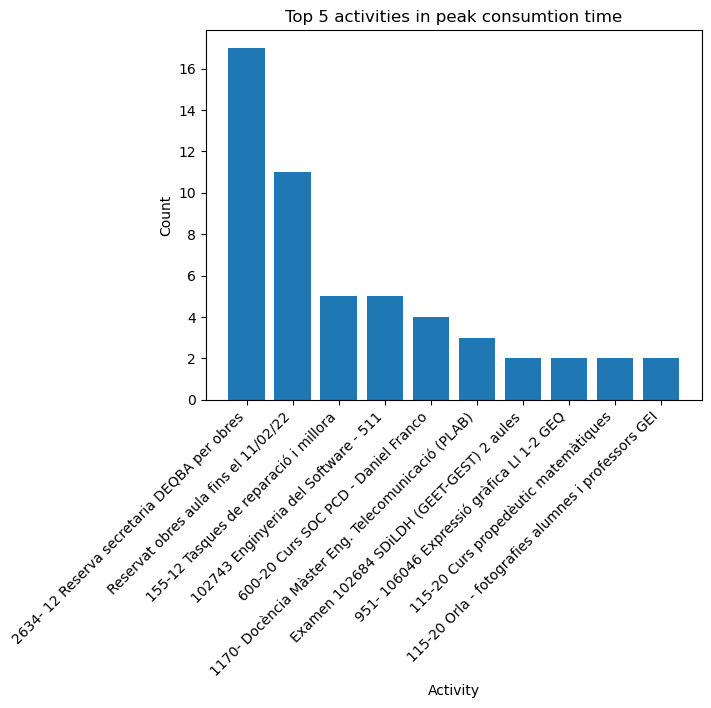

In [103]:

top_5_activities = occupation_df.sort_values(by=['KWHperInstance'])[-100:]["Activitat"].value_counts().head(10)

# Plot
plt.bar(top_5_activities.index, top_5_activities.values)
plt.title('Top 5 activities in peak consumtion time')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [105]:
occupation_df.sort_values(by=['KWHperInstance'])[-100:]["Espai"].value_counts()

QC/0019    19
Q4/1003    16
Q1/0003    15
Q3/0009     6
Q1/1011     6
Q4/0003     4
Q3/1011     4
QC/0015     4
Q2/0007     4
Q3/1003     3
Q1/1003     3
Q3/0003     2
Q3/1007     2
Q5/0004     2
Q2/0011     2
Q1/0019     1
QC/0011     1
Q4/0011     1
Q2/0017     1
Q4/0007     1
Q1/0007     1
Q2/1005     1
Q4/1009     1
Name: Espai, dtype: int64

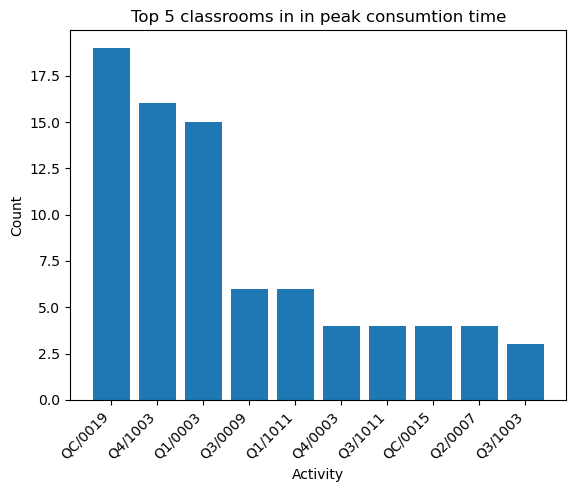

In [102]:

top_5_activities = occupation_df.sort_values(by=['KWHperInstance'])[-100:]["Espai"].value_counts().head(10)

# Plot
plt.bar(top_5_activities.index, top_5_activities.values)
plt.title('Top 5 classrooms in in peak consumtion time')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

It might indicate a correlation but not a causality.

This should probably be contrasted with how much hours does an activity do and how many hours is each class used. Outliers should then be analyzed. Unfrequent activities/rooms associated to high consumtion.

See how many hours are being taken for each activity and classroom

In [108]:
espais = np.unique(occupation_df["Espai"])
activitats = np.unique(occupation_df["Activitat"])

In [117]:
aktivity = pd.DataFrame(columns=["activity","hours","KW"])
aktivity["activity"] = activitats
aktivity["hours"] = np.zeros(len(activitats))
aktivity["KW"] = np.zeros(len(activitats))
lokations = pd.DataFrame(columns=["classroom","hours","KW"])
lokations["classroom"] = espais
lokations["hours"] = np.zeros(len(espais))
lokations["KW"] = np.zeros(len(espais))

In [118]:
for i, row in occupation_df.iterrows():
    aktivity.loc[aktivity["activity"] == row["Activitat"],"hours"] += float(row["Total hores"])
    lokations.loc[lokations["classroom"] == row["Espai"],"hours"] += float(row["Total hores"])

In [119]:
aktivity = aktivity.sort_values(by=['hours'],ascending=False)
lokations = lokations.sort_values(by=["hours"],ascending=False)

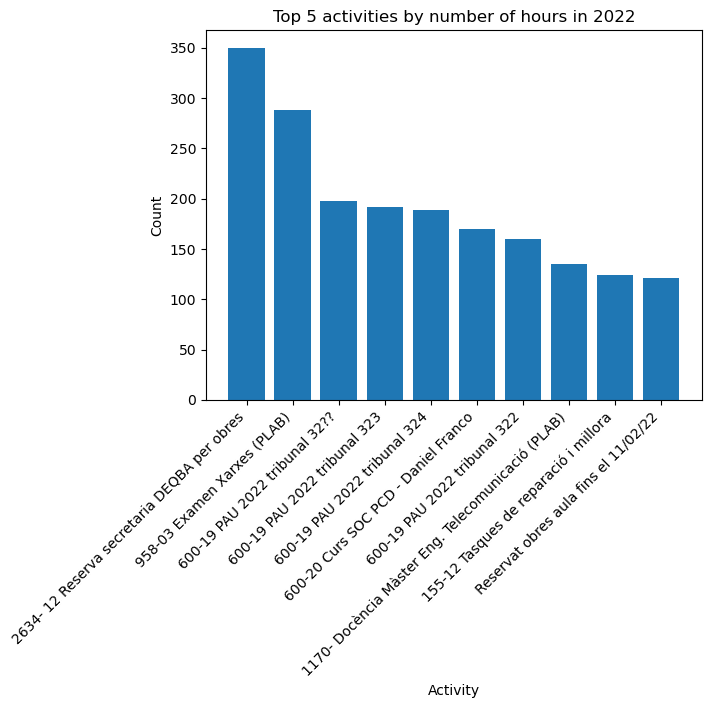

In [120]:
top_5_activities = aktivity.head(10)

# Plot
plt.bar(top_5_activities["activity"], top_5_activities["hours"])
plt.title('Top 5 activities by number of hours in 2022')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

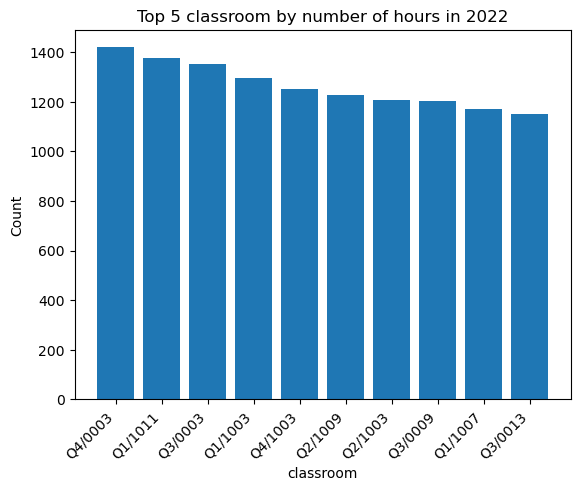

In [130]:
top_5_activities = lokations.head(10)

# Plot
plt.bar(top_5_activities["classroom"], top_5_activities["hours"])
plt.title('Top 5 classroom by number of hours in 2022')
plt.xlabel('classroom')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Get power consumption mean over the whole year for each activity and classroom.

Sum all kwhperInstance and divide by number of hours.

In [121]:
for i, row in occupation_df.iterrows():
    aktivity.loc[aktivity["activity"] == row["Activitat"],"KW"] += float(row["KWHperInstance"])
    lokations.loc[lokations["classroom"] == row["Espai"],"KW"] += float(row["KWHperInstance"])

In [122]:
#normalize over number of hours
for i, row in aktivity.iterrows():
    aktivity.loc[i,"KW"] /= row["hours"]

for i, row in lokations.iterrows():
    lokations.loc[i,"KW"] /= row["hours"]

In [123]:
aktivity

,activity,hours,KW
1288,2634- 12 Reserva secretaria DEQBA per obres,350.0,27.120224
1945,958-03 Examen Xarxes (PLAB),288.0,1.488259
1559,600-19 PAU 2022 tribunal 32??,198.0,0.595776
1555,600-19 PAU 2022 tribunal 323,191.5,0.629756
1557,600-19 PAU 2022 tribunal 324,188.5,0.596194
...,...,...,...
1956,958-03 Prova d'avaluació de Fonaments d'Inform...,0.5,0.000000
1527,472-01 Reunió alumnes projete,0.5,11.218235
1523,471-07 Presentació Smart Cities,0.5,0.000000
1365,2634-05 Lectura de tesis doctoral Carolina Arnau,0.5,0.000000


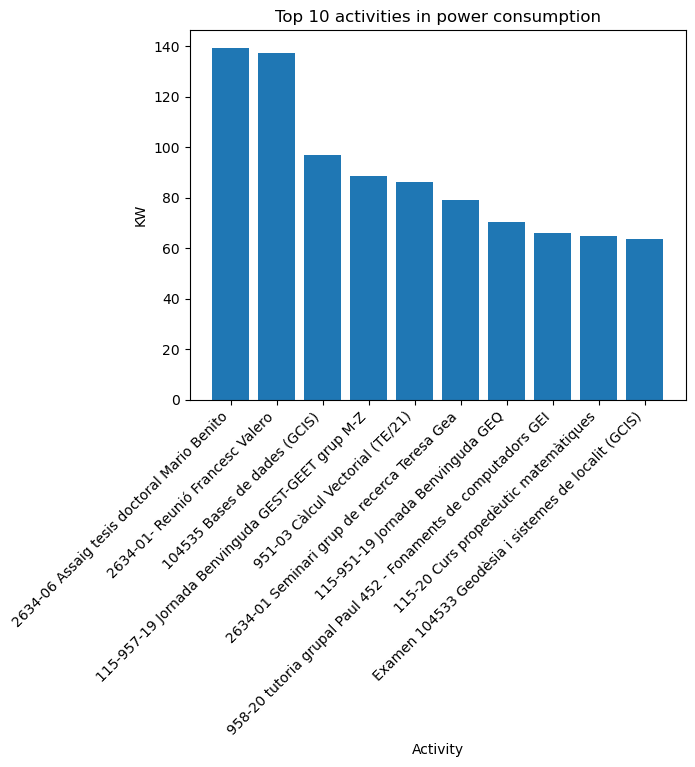

In [125]:

top_5_activities = aktivity.sort_values(by=['KW'],ascending=False).head(10)

# Plot
plt.bar(top_5_activities["activity"], top_5_activities["KW"])
plt.title('Top 10 activities in power consumption')
plt.xlabel('Activity')
plt.ylabel('KW')
plt.xticks(rotation=45, ha='right')
plt.show()

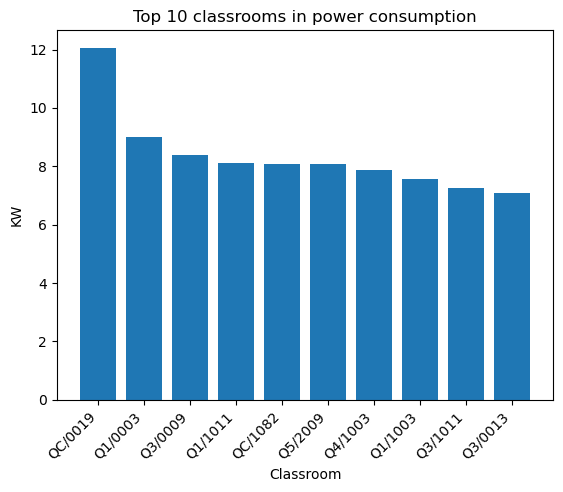

In [128]:

top_5_activities = lokations.sort_values(by=['KW'],ascending=False).head(10)

# Plot
plt.bar(top_5_activities["classroom"], top_5_activities["KW"])
plt.title('Top 10 classrooms in power consumption')
plt.xlabel('Classroom')
plt.ylabel('KW')
plt.xticks(rotation=45, ha='right')
plt.show()